In [17]:
import numpy as np
import matplotlib.pyplot as plt
from V_A_change_utils import rho_A_t_fn, cum_A_t_fn
import pandas as pd

In [57]:
T_Trunc = 0.3
t_pts = np.linspace(0., 4, 1000)

v = 4; theta = 2
def truncated_rho(t):
    if t < T_Trunc:
        return 0
    else:
        return rho_A_t_fn(t, v, theta)

Text(0.5, 1.0, 'Truncated and Untruncated Densities')

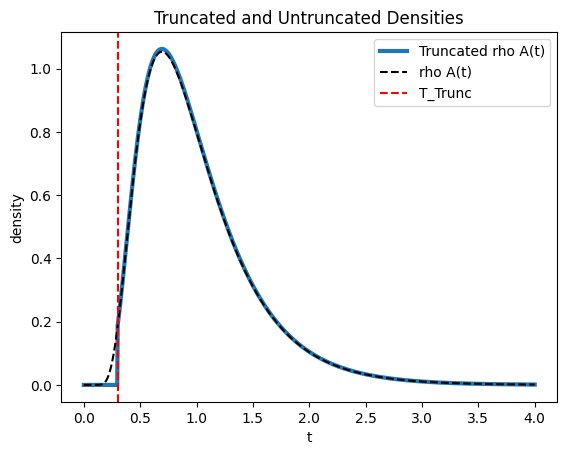

In [55]:
plt.plot(t_pts, [truncated_rho(t)/(1 - cum_A_t_fn(T_Trunc,v,theta)) for t in t_pts], label='Truncated rho A(t)', lw=3)
# plt.fill_between(t_pts, [truncated_rho(t)/(1 - cum_A_t_fn(T_Trunc,v,theta)) for t in t_pts], color='skyblue', alpha=0.4)
plt.plot(t_pts, [rho_A_t_fn(t, v, theta) for t in t_pts], label='rho A(t)', color='k', ls='--')
# plt.fill_between(t_pts, [rho_A_t_fn(t, v, theta) for t in t_pts], color='orange', alpha=0.4)
plt.axvline(x=T_Trunc, color='red', linestyle='--', label='T_Trunc')
plt.legend()
plt.xlabel('t')
plt.ylabel('density')
plt.title('Truncated and Untruncated Densities')


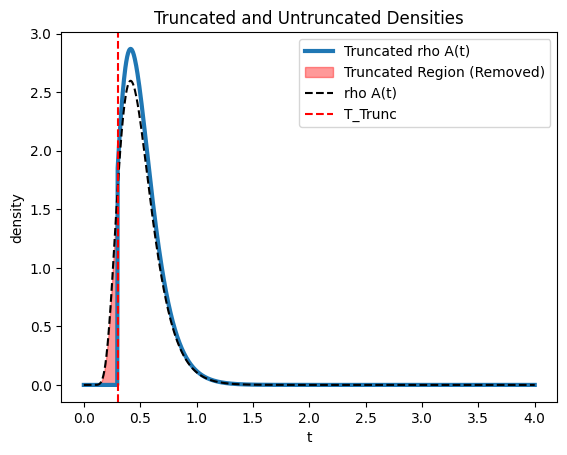

In [58]:
import numpy as np
import matplotlib.pyplot as plt

# Plot the truncated PDF
plt.plot(
    t_pts,
    [truncated_rho(t) / (1 - cum_A_t_fn(T_Trunc, v, theta)) for t in t_pts],
    label='Truncated rho A(t)', lw=3
)

# Fill the 'truncated' region in red
# In this example, we show everything BELOW T_Trunc as truncated:
plt.fill_between(
    t_pts,
    [rho_A_t_fn(t, v, theta) for t in t_pts],
    where=(t_pts < T_Trunc),
    color='red', alpha=0.4,
    label='Truncated Region (Removed)'
)

# Plot the untruncated PDF in dashed black
plt.plot(
    t_pts,
    [rho_A_t_fn(t, v, theta) for t in t_pts],
    label='rho A(t)', color='k', ls='--'
)

# Vertical line at the truncation boundary
plt.axvline(x=T_Trunc, color='red', linestyle='--', label='T_Trunc')

# Labels/Legend/Title
plt.xlabel('t')
plt.ylabel('density')
plt.title('Truncated and Untruncated Densities')
plt.legend()

plt.show()


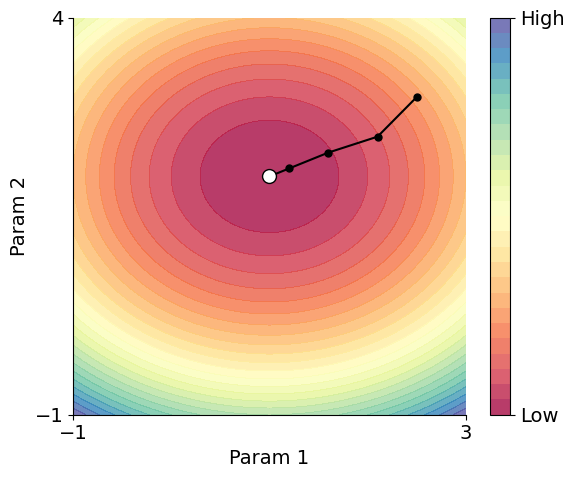

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Define a simple 2D objective function
def objective(x, y):
    return (x - 1)**2 + (y - 2)**2

# 2. Create a mesh for plotting f(x, y)
x_vals = np.linspace(-1, 3, 200)
y_vals = np.linspace(-1, 4, 200)
X, Y = np.meshgrid(x_vals, y_vals)
Z = objective(X, Y)

# 3. Simulate a few “steps” (just an example)
points = np.array([
    [2.5, 3.0],
    [2.1, 2.5],
    [1.6, 2.3],
    [1.2, 2.1],
    [1.0, 2.0],  # near the minimum
])

# 4. Plot
plt.figure(figsize=(6, 5))

# Contour fill (high-contrast colormap)
contour_filled = plt.contourf(X, Y, Z, levels=30, cmap='Spectral', alpha=0.8)

# Color bar with only two ticks: Low and High
cbar = plt.colorbar(contour_filled, ticks=[Z.min(), Z.max()])
cbar.ax.set_yticklabels(['Low', 'High'])

# Plot the path: circles connected by a line
plt.plot(points[:, 0], points[:, 1], '-o', color='black', markersize=5)

# Mark the final point more clearly
plt.scatter(points[-1, 0], points[-1, 1],
            color='white', edgecolors='black', s=100, zorder=5)

# Remove top/right spines and reduce ticks
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Set minimal ticks on x and y axes
ax.set_xticks([x_vals[0], x_vals[-1]])   # only left/right extremes
ax.set_yticks([y_vals[0], y_vals[-1]])   # only bottom/top extremes

ax.set_xlabel('Param 1')
ax.set_ylabel('Param 2')
# Optionally, enlarge font and tighten layout
plt.rcParams.update({'font.size': 14})
plt.tight_layout()

plt.show()


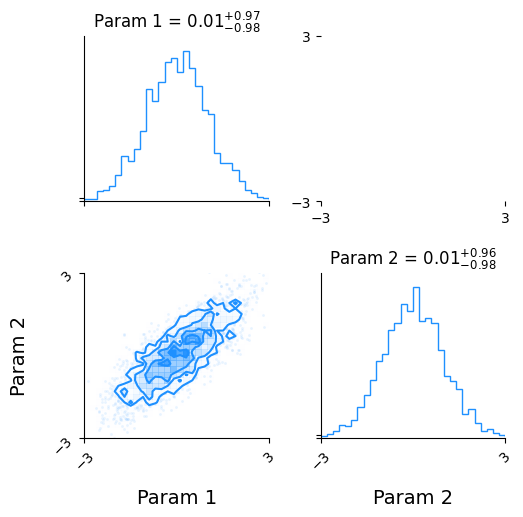

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import corner

# 1. Generate positively correlated samples
np.random.seed(42)
mean = [0, 0]
cov = [[1, 0.8],
       [0.8, 1]]  # correlation ~ 0.8
samples = np.random.multivariate_normal(mean, cov, size=3000)

# 2. Create corner plot (2D + marginal distributions)
fig = corner.corner(
    samples,
    labels=["Param 1", "Param 2"],
    range=[(-3, 3), (-3, 3)],  # define axis range for clarity
    bins=30,
    color="dodgerblue",
    show_titles=True,
    label_kwargs={"fontsize": 14},
    title_kwargs={"fontsize": 12},
)

# 3. Clean up each subplot: minimal ticks, remove spines
for ax in fig.axes:
    # Remove top/right spines
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)

    # If the x-axis is visible, set only two ticks at extremes
    if ax.xaxis.get_visible():
        ax.set_xticks([-3, 3])  # just two ticks
    # If the y-axis is visible, set only two ticks at extremes
    if ax.yaxis.get_visible():
        ax.set_yticks([-3, 3])  # just two ticks

    # Adjust tick label size
    ax.tick_params(axis='both', which='major', labelsize=10)

plt.tight_layout()
plt.show()


In [94]:
og_df = pd.read_csv('../out_LED.csv')
df = og_df[ og_df['repeat_trial'].isin([0,2]) | og_df['repeat_trial'].isna() ]
session_type = 7    
df = df[ df['session_type'].isin([session_type]) ]
training_level = 16
df = df[ df['training_level'].isin([training_level]) ]

# drop rows from df where intended_fix, LED_onset_time and timed_fix are nan
df = df.dropna(subset=['intended_fix', 'LED_onset_time', 'timed_fix'])
tuple_column = list(zip(df['intended_fix'], df['intended_fix'] - df['LED_onset_time']))

In [13]:
df_led_off = df[df['LED_trial'] == 0]
df_led_off_aborts = df_led_off[df_led_off['abort_event'] == 3]

df_led_off_abort_rt = df_led_off_aborts['timed_fix'] 

df_led_on = df[df['LED_trial'] == 1]
df_led_on_aborts = df_led_on[df_led_on['abort_event'] == 3]

df_led_on_abort_rt = df_led_on_aborts['timed_fix']

# valid trials OFF and ON

In [95]:
df_led_off = df[(df['LED_trial'] == 0) & (df['timed_fix'] > df['intended_fix'])]
valid_rt_wrt_stim_off = df_led_off['timed_fix'] - df_led_off['intended_fix']

df_led_on = df[(df['LED_trial'] == 1) & (df['timed_fix'] > df['intended_fix'])]
valid_rt_wrt_stim_on = df_led_on['timed_fix'] - df_led_on['intended_fix']

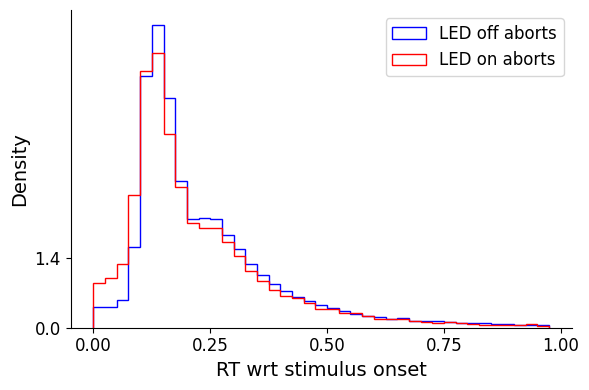

In [102]:
bins = np.arange(0, 1, 0.025)

plt.figure(figsize=(6, 4))

plt.hist(valid_rt_wrt_stim_off, bins=bins, label='LED off aborts',
         histtype='step', density=True, color='b')
plt.hist(valid_rt_wrt_stim_on, bins=bins, label='LED on aborts',
         histtype='step', density=True, color='r')

ax = plt.gca()

# Set font sizes for axis labels
ax.set_xlabel('RT wrt stimulus onset', fontsize=14)
ax.set_ylabel('Density', fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=12)

# X-axis: Limit to 4 ticks (including 0, 2)
x_vals = ax.get_xlim()  # e.g. (0.0, 2.0)
ax.set_xticks(np.arange(0, 1.25, 0.25))

# Y-axis: only 2 ticks: 0 and max
ax.set_yticks([0, 1.4])

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Increase legend font
plt.legend(fontsize=12)

plt.tight_layout()
plt.show()


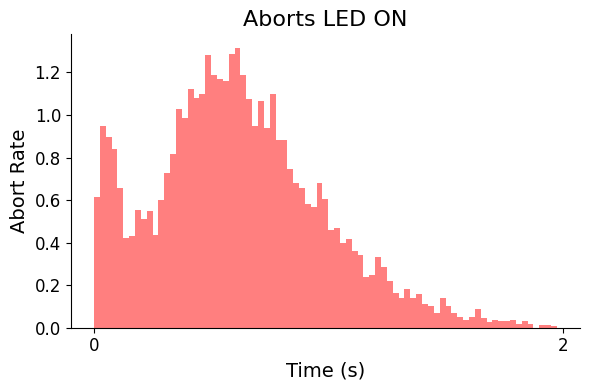

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Example data and bins
bins = np.arange(0, 2, 0.025)

plt.figure(figsize=(6,4))
plt.hist(df_led_off_abort_rt, bins=bins, alpha=0.5, density=True, label='LED off aborts')
# plt.hist(df_led_on_abort_rt, bins=bins, alpha=0.5, density=True, label='LED on aborts', color='r')


# Get current axes
ax = plt.gca()

# Set labels/title with larger fonts
ax.set_title('Aborts LED OFF', fontsize=16)
ax.set_xlabel('Time (s)', fontsize=14)
ax.set_ylabel('Abort Rate', fontsize=14)

# Use only two x-ticks (at the extremes: 0 and 2)
ax.set_xticks([0, 2])
ax.tick_params(axis='both', which='major', labelsize=12)

# Remove the top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Tight layout for minimal margins
plt.tight_layout()
plt.show()


In [68]:
dt = 1e-3
dB = np.sqrt(dt)

def simulate_single_bound(v,a):

    dv = 0; t = 0
    while True:
        dv += v*dt + np.random.normal(0, dB)
        t += dt

        if dv > a:
            return t

In [73]:
from joblib import Parallel, delayed
from tqdm.notebook import tqdm
v = 1; a = 2
N_sim = int(100e3)
sim_res = Parallel(n_jobs=4)(delayed(simulate_single_bound)(v,a) for _ in tqdm(range(N_sim)))


  0%|          | 0/100000 [00:00<?, ?it/s]

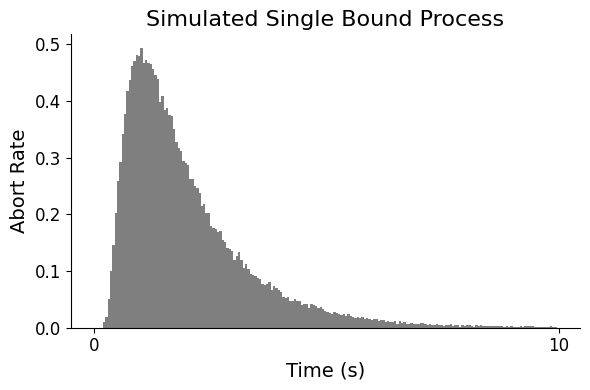

In [70]:
import numpy as np
import matplotlib.pyplot as plt

bins = np.arange(0, 10, 0.05)
plt.figure(figsize=(6, 4))

plt.hist(sim_res, bins=bins, density=True, color='k', alpha=0.5)

ax = plt.gca()

ax.set_title('Simulated Single Bound Process', fontsize=16)
ax.set_xlabel('Time (s)', fontsize=14)
ax.set_ylabel('Abort Rate', fontsize=14)

# Only two x-ticks at the extreme values
ax.set_xticks([0, 10])
ax.tick_params(axis='both', labelsize=12)

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()


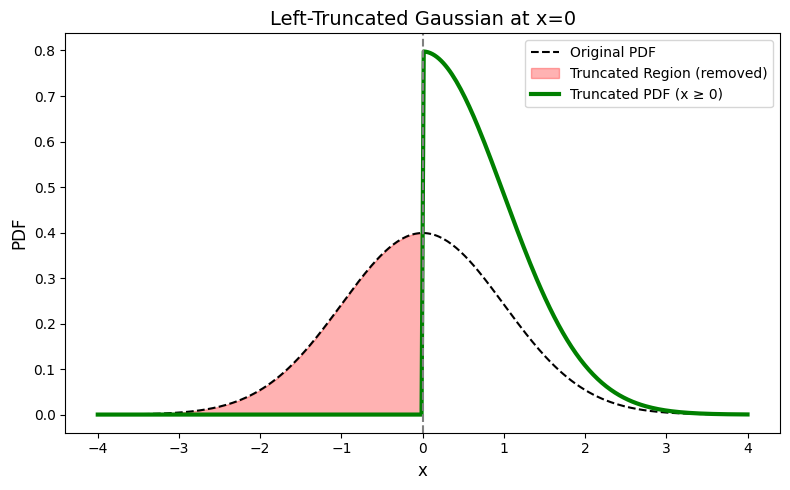

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Parameters for a standard normal
mu, sigma = 0, 1

# x-range for plotting
x = np.linspace(-4, 4, 300)

# Original Gaussian PDF
pdf_original = norm.pdf(x, mu, sigma)

# The probability of X < 0 for a standard normal (which is 0.5)
# But let's calculate it in case you change mu, sigma.
p_left = norm.cdf(0, mu, sigma)

# Truncated PDF for x >= 0:
# pdf_trunc(x) = pdf_original(x) / (1 - p_left), for x >= 0
pdf_trunc = np.where(x >= 0, pdf_original / (1.0 - p_left), 0)

# Plot
plt.figure(figsize=(8, 5))

# 1. Original PDF in black
plt.plot(x, pdf_original, 'k', label='Original PDF', ls='--')

# 2. Shade the truncated (removed) region: x < 0
plt.fill_between(x, pdf_original, where=(x < 0), color='red', alpha=0.3,
                 label='Truncated Region (removed)')

# 3. Truncated PDF in green (only for x >= 0, zero otherwise)
plt.plot(x, pdf_trunc, 'g', label='Truncated PDF (x ≥ 0)', lw=3)

# Vertical line at x=0
plt.axvline(0, color='gray', linestyle='--')

plt.title("Left-Truncated Gaussian at x=0", fontsize=14)
plt.xlabel("x", fontsize=12)
plt.ylabel("PDF", fontsize=12)
plt.legend(fontsize=10)
# Remove top and right spines

plt.tight_layout()
plt.show()


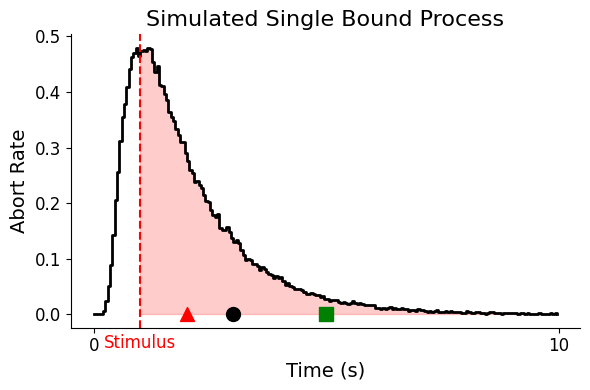

In [77]:
import numpy as np
import matplotlib.pyplot as plt

# Example data (replace with your actual 'sim_res'):
np.random.seed(0)
# sim_res = np.random.exponential(scale=1.5, size=1000)

bins = np.arange(0, 10, 0.05)

plt.figure(figsize=(6, 4))

# 1) Compute histogram counts and edges, density=True normalizes
counts, edges = np.histogram(sim_res, bins=bins, density=True)

# 2) Build step-plot arrays
#    We need (x, y) pairs that "stair-step" from one bin to the next
x_step = np.zeros(2 * len(counts) + 2)
y_step = np.zeros(2 * len(counts) + 2)

x_step[0], y_step[0] = edges[0], 0  # start at (left_edge, 0)
idx = 1
for c, (left_edge, right_edge) in zip(counts, zip(edges[:-1], edges[1:])):
    x_step[idx],   y_step[idx]   = left_edge,  c
    x_step[idx+1], y_step[idx+1] = right_edge, c
    idx += 2
x_step[-1], y_step[-1] = edges[-1], 0  # end at (right_edge, 0)

# 3) Plot the step histogram (no fill yet)
plt.plot(x_step, y_step, color='k', lw=2)

# 4) Add the vertical stimulus line (red, dashed)
stim_time = 1
plt.axvline(stim_time, color='red', linestyle='--')

# Place the "Stimulus" label **below** the axis at x=1
ax = plt.gca()
ax.text(stim_time, -0.02, 'Stimulus',
        color='red', ha='center', va='top', fontsize=12,
        transform=ax.get_xaxis_transform())  # positions text below x-axis

# 5) Fill only under the histogram for x >= 1 (red shading)
plt.fill_between(
    x_step, y_step, 0,
    where=(x_step >= stim_time),
    color='red', alpha=0.2
)

# 6) Place three markers (triangle, circle, square) on the x-axis after t=1
marker_times = [2, 3, 5]  # your chosen times
markers = ['^', 'o', 's']
marker_colors = ['r', 'k', 'green']
m_id = 0
for mt, mk in zip(marker_times, markers):
    ax.scatter(mt, 0, marker=mk, s=100, color=marker_colors[m_id],
               clip_on=False, zorder=5)
    m_id += 1

# 7) Set labels, limited ticks, remove top/right spines
ax.set_title('Simulated Single Bound Process', fontsize=16)
ax.set_xlabel('Time (s)', fontsize=14)
ax.set_ylabel('Abort Rate', fontsize=14)
ax.set_xticks([0, 10])
ax.tick_params(axis='both', labelsize=12)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()


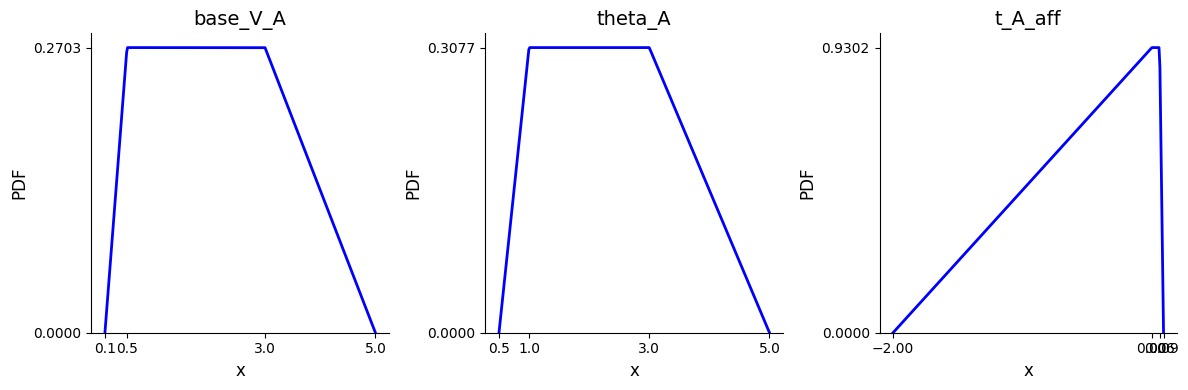

In [81]:
import numpy as np
import matplotlib.pyplot as plt

def trapezoidal_pdf(x, a, b, c, d):
    if x < a or x > d:
        return 0.0
    area = ((b - a) + (d - c)) / 2 + (c - b)
    h_max = 1.0 / area
    if a <= x <= b:
        return ((x - a) / (b - a)) * h_max
    elif b < x < c:
        return h_max
    elif c <= x <= d:
        return ((d - x) / (d - c)) * h_max
    return 0.0

params = [
    ("base_V_A",  (0.1, 0.5, 3.0, 5.0)),
    ("theta_A",   (0.5, 1.0, 3.0, 5.0)),
    ("t_A_aff",   (-2.0, 0.0, 0.06, 0.09)),
]

fig, axs = plt.subplots(1, 3, figsize=(12, 4))

for i, (varname, (a, b, c, d)) in enumerate(params):
    x = np.linspace(a, d, 300)
    pdf_vals = [trapezoidal_pdf(xi, a, b, c, d) for xi in x]
    axs[i].plot(x, pdf_vals, color='blue', lw=2)
    axs[i].set_title(varname, fontsize=14)
    axs[i].set_xticks([a, b, c, d])
    y_max = max(pdf_vals) if pdf_vals else 1
    axs[i].set_yticks([0, y_max])
    axs[i].set_ylim(0, 1.05 * y_max)
    axs[i].spines['top'].set_visible(False)
    axs[i].spines['right'].set_visible(False)
    axs[i].tick_params(axis='both', labelsize=10)
    axs[i].set_xlabel("x", fontsize=12)
    axs[i].set_ylabel("PDF", fontsize=12)

plt.tight_layout()
plt.show()


# rough

Text(0.5, 1.0, 'Types of f(t)')

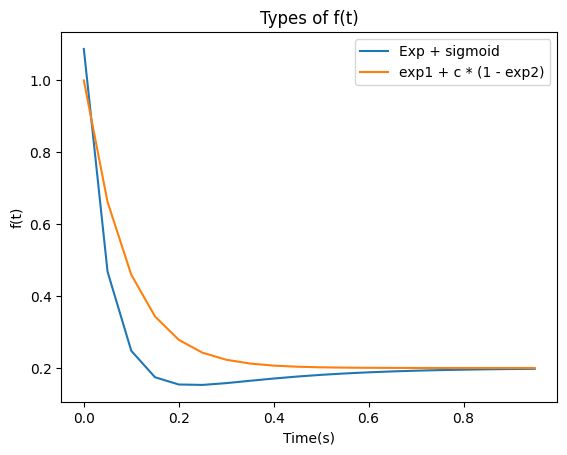

In [13]:
import numpy as np
import matplotlib.pyplot as plt
t_pts = np.arange(0, 1, 0.05)
decay_1 = np.exp(-t_pts/0.05) + 0.2 / ( 1 + np.exp(-(t_pts - 0.05)/ 0.2))
plt.plot(t_pts, decay_1, label='Exp + sigmoid')
plt.title('exp decay + sigmoid')
plt.xlabel('Time(s)')
plt.ylabel('f(t)')

decay_2 = np.exp(-t_pts/0.08) + 0.2 *(1-np.exp(-t_pts/0.05))
plt.plot(t_pts, decay_2, label='exp1 + c * (1 - exp2)')

plt.legend()
plt.title('Types of f(t)')


# rough

In [16]:
t_pts = np.arange(0,1,0.05)

In [15]:
plt.plot(t_pts, np.exp(-t_pts/0.05), label='exp')

1.0

# motor delay

In [18]:
og_df = pd.read_csv('../out_LED.csv')
df = og_df[ og_df['repeat_trial'].isin([0,2]) | og_df['repeat_trial'].isna() ]
session_type = 7    
df = df[ df['session_type'].isin([session_type]) ]
training_level = 16
df = df[ df['training_level'].isin([training_level]) ]

# drop rows from df where intended_fix, LED_onset_time and timed_fix are nan
df = df.dropna(subset=['intended_fix', 'LED_onset_time', 'timed_fix'])
tuple_column = list(zip(df['intended_fix'], df['intended_fix'] - df['LED_onset_time']))

In [19]:
df_led_off = df [ df['LED_trial'] == 0 ]
df_led_on = df [ df['LED_trial'] == 1 ]

In [20]:
df_led_off_aborts = df_led_off[ df_led_off['abort_event'] == 3 ]
df_led_on_aborts = df_led_on[ df_led_on['abort_event'] == 3 ]

In [29]:
led_off_aborts_wrt_led = df_led_off_aborts['timed_fix'] - (df_led_off_aborts['intended_fix'] - df_led_off_aborts['LED_onset_time'])
led_on_aborts_wrt_led = df_led_on_aborts['timed_fix'] - (df_led_on_aborts['intended_fix'] - df_led_on_aborts['LED_onset_time'])

In [34]:
-1 * (df_led_off['LED_onset_time'] - df_led_off['intended_fix']).values

array([0.30192479, 0.84445234, 0.18876798, ..., 0.21870478, 0.36876354,
       0.08658257])

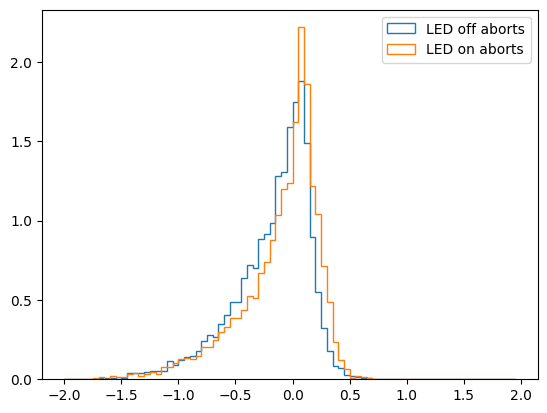

In [30]:
bins = np.arange(-2, 2, 0.05)
plt.hist(led_off_aborts_wrt_led, bins=bins, label='LED off aborts', density=True, histtype='step')
plt.hist(led_on_aborts_wrt_led, bins=bins, label='LED on aborts', density=True, histtype='step')
plt.legend()